# 3. SMOTE

In this part we will explore SMOTE as a solution to class imbalance.

---

### 1. Do all imports to make the project work

In [3]:
%pip install ucimlrepo scikit-learn imblearn umap-learn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\adoye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

---

Optional for seaborn to make graphs more beautiful ✨

In [6]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100  # Better image quality


---

### 2. Import the dataset and then divide into X (features) and y (labels)

In [4]:
covertype = fetch_ucirepo(id=31)

In [5]:
X = covertype.data.features
y = covertype.data.targets

In [6]:
if isinstance(y, pd.DataFrame):
    y = y.squeeze()
elif isinstance(y, np.ndarray) and y.ndim > 1:
    y = y.ravel()

---

### 3. Data Exploration to understand it better

In [7]:
print(covertype.metadata)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [8]:
print(covertype.variables)

                                  name     role     type demographic  \
0                            Elevation  Feature  Integer        None   
1                               Aspect  Feature  Integer        None   
2                                Slope  Feature  Integer        None   
3     Horizontal_Distance_To_Hydrology  Feature  Integer        None   
4       Vertical_Distance_To_Hydrology  Feature  Integer        None   
5      Horizontal_Distance_To_Roadways  Feature  Integer        None   
6                        Hillshade_9am  Feature  Integer        None   
7                       Hillshade_Noon  Feature  Integer        None   
8                        Hillshade_3pm  Feature  Integer        None   
9   Horizontal_Distance_To_Fire_Points  Feature  Integer        None   
10                    Wilderness_Area1  Feature  Integer        None   
11                          Soil_Type1  Feature  Integer        None   
12                          Soil_Type2  Feature  Integer        

In [9]:
display(X.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [10]:
display(y.head())

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [11]:
display(X.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
display(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

None

In [13]:
print(y.value_counts())

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


Great class imbalance, it needs to be fixed !

---

### 4. Understanding the parameter K of SMOTE

SMOTE has a parameter k_neighbors. I want to be able to explore the consequence of this parameter. As such, we will take the default value 5 and increase it into the max value 2746 (we cannot go higher as the smallest class has 2747 instances and we cannot have more neighbors than data points)

In [3]:
k_neighbors_list = [5, 10, 20, 50, 100, 500, 1000, 2000, 2746]


We save the different datasets for more flexibility

In [8]:
resampled_dir = 'SMOTE_DATASETS'
os.makedirs(resampled_dir, exist_ok=True)

Let's create them !

In [16]:
for k in k_neighbors_list:
    print(f"\nApplying SMOTE with k_neighbors={k}...")
    smote = SMOTE(random_state=42, k_neighbors=k)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Ensure y_resampled is 1D
    if isinstance(y_resampled, pd.DataFrame):
        y_resampled = y_resampled.squeeze()
    elif isinstance(y_resampled, np.ndarray) and y_resampled.ndim > 1:
        y_resampled = y_resampled.ravel()

    
    resampled_data = pd.concat([
        pd.DataFrame(X_resampled, columns=X.columns),
        pd.Series(y_resampled, name='Cover_Type')
    ], axis=1)

    print("Class distribution after SMOTE: \n")
    print(pd.Series(y_resampled).value_counts())
    
    # Save the resampled data to a CSV file
    output_csv = os.path.join(resampled_dir, f'SMOTE_{k}.csv')
    resampled_data.to_csv(output_csv, index=False)
    
    print(f"Resampled data saved to '{output_csv}'.")



Applying SMOTE with k_neighbors=5...
Class distribution after SMOTE: 

Cover_Type
5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: count, dtype: int64
Resampled data saved to 'SMOTE_DATASETS\SMOTE_5.csv'.

Applying SMOTE with k_neighbors=10...
Class distribution after SMOTE: 

Cover_Type
5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: count, dtype: int64
Resampled data saved to 'SMOTE_DATASETS\SMOTE_10.csv'.

Applying SMOTE with k_neighbors=20...
Class distribution after SMOTE: 

Cover_Type
5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: count, dtype: int64
Resampled data saved to 'SMOTE_DATASETS\SMOTE_20.csv'.

Applying SMOTE with k_neighbors=50...
Class distribution after SMOTE: 

Cover_Type
5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: count, dtype: int64
Resampled data saved to 'SMOTE_DATASETS\SMOTE_50.csv'.

Apply

Now that we have balanced classes, we can see the effect of the k_neighbor parameter by evaluating the model on Random Forest

In [1]:
results = []

In [9]:
for k in k_neighbors_list:
    file_path = os.path.join(resampled_dir, f'SMOTE_{k}.csv')
    print(f"\nTraining Random Forest for k neighbors={k}")
    
    # Load resampled data
    data = pd.read_csv(file_path)
    X_resampled = data.drop(columns=['Cover_Type'])
    y_resampled = data['Cover_Type']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    
    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Train the classifier
    rf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Evaluate the model
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results
    results.append({
        'k_neighbors': k,
        'Accuracy': accuracy,
        'Precision (weighted)': precision,
        'F1 Score (weighted)': f1
    })
    
    # Print classification report
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Training Random Forest for k neighbors=5
Accuracy: 0.9888
Precision (weighted): 0.9888
F1 Score (weighted): 0.9888

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     56660
           2       0.97      0.96      0.97     56660
           3       1.00      1.00      1.00     56660
           4       1.00      1.00      1.00     56661
           5       1.00      1.00      1.00     56660
           6       0.99      1.00      1.00     56660
           7       1.00      1.00      1.00     56661

    accuracy                           0.99    396622
   macro avg       0.99      0.99      0.99    396622
weighted avg       0.99      0.99      0.99    396622


Training Random Forest for k neighbors=10
Accuracy: 0.9880
Precision (weighted): 0.9879
F1 Score (weighted): 0.9880

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     56660
           2 

This is too much info, but we can see a trend, let's make a graph to see it more clearly

,k_neighbors,Accuracy,Precision (weighted),F1 Score (weighted)
0,5,0.988818,0.988769,0.988788
1,10,0.987994,0.987941,0.987961
2,20,0.986972,0.986920,0.986938
3,50,0.984436,0.984386,0.984399
4,100,0.982671,0.982623,0.982629
5,500,0.974626,0.974582,0.974564
6,1000,0.969679,0.969649,0.969604
7,2000,0.964114,0.964095,0.964016
8,2746,0.961056,0.961013,0.960937


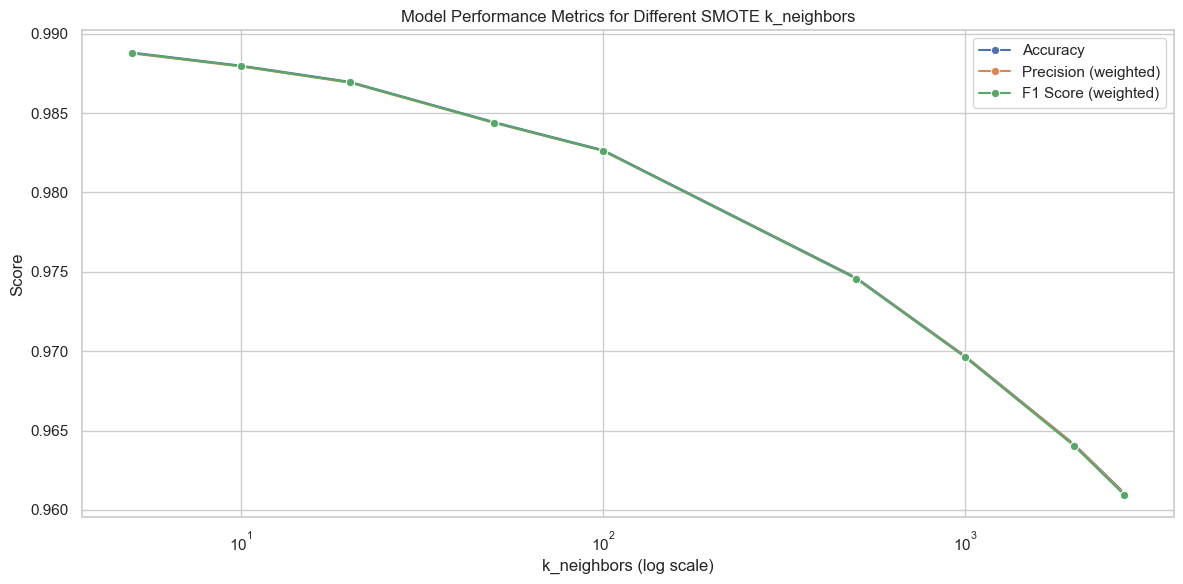

In [10]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the results by k_neighbors for better readability
results_df = results_df.sort_values(by='k_neighbors')

# Display the results
display(results_df)

# Optional: Visualize the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='k_neighbors', y='Accuracy', marker='o', label='Accuracy')
sns.lineplot(data=results_df, x='k_neighbors', y='Precision (weighted)', marker='o', label='Precision (weighted)')
sns.lineplot(data=results_df, x='k_neighbors', y='F1 Score (weighted)', marker='o', label='F1 Score (weighted)')
plt.xscale('log')  # Since k_neighbors vary exponentially
plt.xlabel('k_neighbors (log scale)')
plt.ylabel('Score')
plt.title('Model Performance Metrics for Different SMOTE k_neighbors')
plt.legend()
plt.tight_layout()
plt.show()

Now we can clearly see that the more neighbors that we have, the worst the model performs.

This might be beacuse the k_neighbors parameter controls the number of neighbors that is considered when creating synthetic data, habind a larger k means that neighbors that are further away will have more influence. However, this can be noise or not representative for that data point, and as such introduce noice and greter variability.

As such, in our case, a lower k is better and it is the one we will visualize.

#### Analysis

We can also see that our best results:
Accuracy : 0.988818	
Precision :  0.988769	
Recall :    0.988788

Are the best results that have ever had with the Random Forest Classifier with those parameters, beating Undersampling and No Class Balancing approaches.

This might be because the synthetic data generated helped to reduce bias and improved the classifier's ability to generalize, leading to a more optimized algorithm.

---

### 5. Visualization

Because we have a large dataset we will take only the best of the best for visualization, the one with k = 5 neighbors

In [1]:
from sklearn.manifold import TSNE
import umap

In [5]:
# Load the dataset
csv_path = r"SMOTE_DATASETS\SMOTE_5.csv"
SMOTE_5_data = pd.read_csv(csv_path)

In [7]:
X5k = SMOTE_5_data.drop(columns=["Cover_Type"])
y5k = SMOTE_5_data["Cover_Type"]

Let's try to do TSNE on the whole dataset.

In [ ]:

tsne = TSNE(n_components=2, random_state=42, perplexity=100, max_iter=1500, learning_rate=600)
X_tsne = tsne.fit_transform(X5k)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", marker='o', s=30, alpha=0.7, edgecolor="k")
plt.title(f"T-SNE Visualization - SMOTE 5 Neighbors")
plt.legend(title="Classes", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.tight_layout()
plt.show()


MemoryError: Unable to allocate 8.89 GiB for an array with shape (1193830414,) and data type float64

Well this is about 5 hours of my life I will never get back... Let's find solutions

The solution will be to so stratified random sampling. We use this solution to keep the same balance in classes (which is good for SMOTE) but will take 50 000 data points only, which should be enough for our visualization purpose.

In [8]:
sample_size = 50000

In [9]:
sample_df, _ = train_test_split(
    SMOTE_5_data,
    train_size=sample_size,
    stratify=SMOTE_5_data['Cover_Type'],
    random_state=42
)

In [10]:
numerical_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

As TSNE is distance sensitive, we unse the standard scaler

In [11]:
scaler = StandardScaler()

In [12]:
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])

In [13]:
X_tsne = sample_df.drop('Cover_Type', axis=1)
labels = sample_df['Cover_Type']

In [18]:
X_tsne.shape, labels.shape

((50000, 54), (50000,))

We apply TSNE

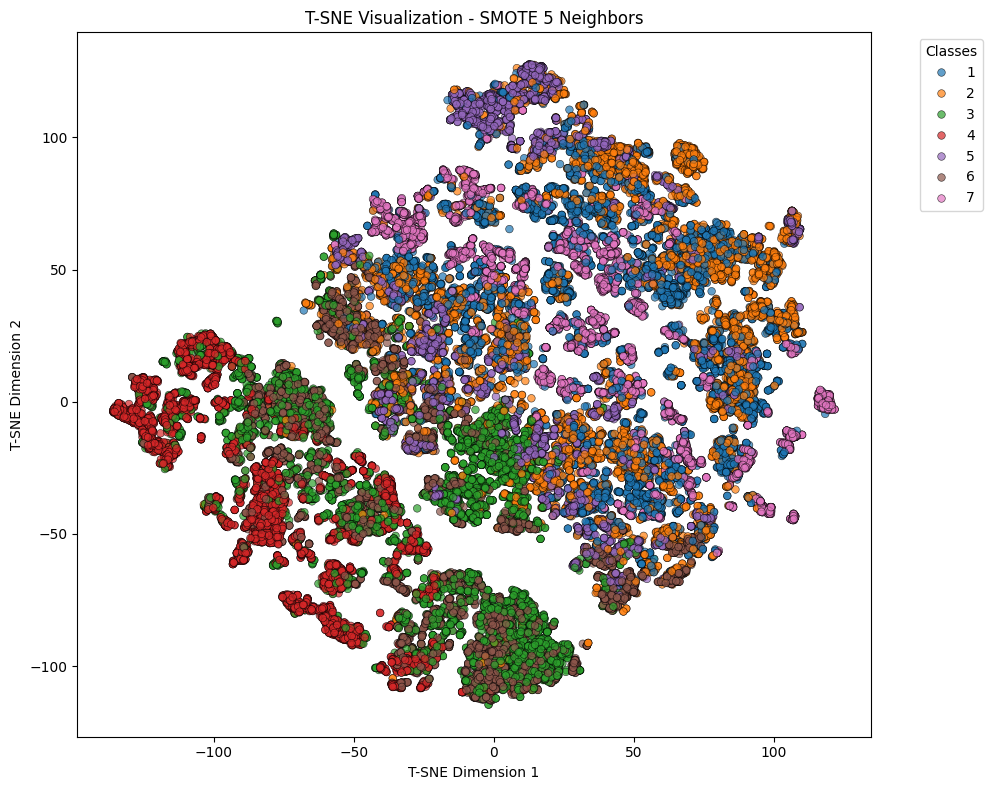

In [27]:
tsne = TSNE(n_components=2, random_state=42, perplexity=100, max_iter=1500, learning_rate=600)
X5k = tsne.fit_transform(X_tsne)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X5k[:, 0], y=X5k[:, 1], hue=labels, palette="tab10", marker='o', s=30, alpha=0.7, edgecolor="k")
plt.title(f"T-SNE Visualization - SMOTE 5 Neighbors")
plt.legend(title="Classes", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.tight_layout()
plt.show()

Contrary to before with no data balancing, what we can observed are fairly well seperated clusers with some overlapp. We can see that there is a balanced class distribution with a relativly uniform density of points. 

We can say that SMOTE overall improved the data distribution. And it got better results than the other solutions !

We apply UMAP

C:\Users\adoye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


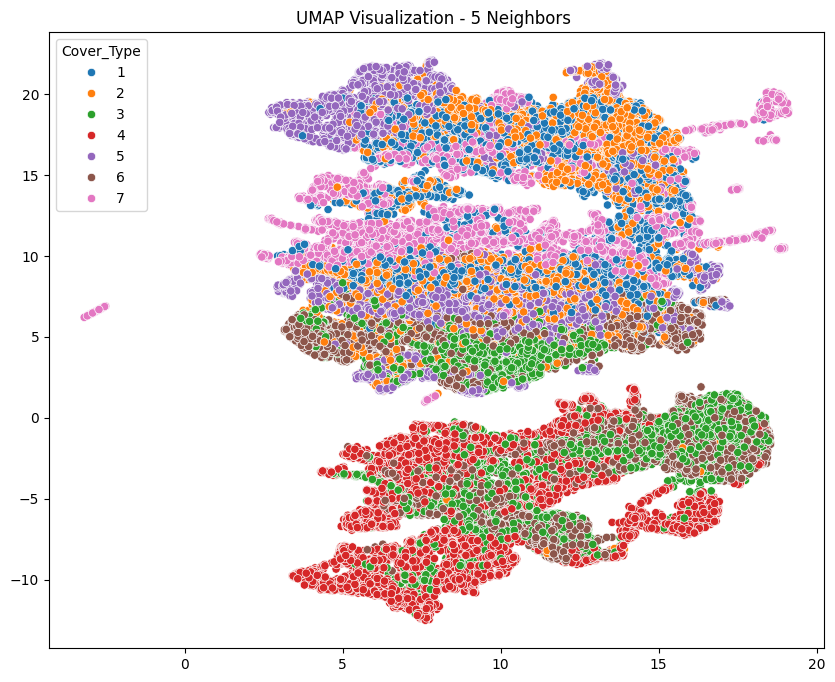

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=50, min_dist=0.5)
X_umap = umap_model.fit_transform(X_tsne)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='tab10', marker='o')
plt.title(f'UMAP Visualization - 5 Neighbors ')
plt.show()

For this UMAP graph we can see seemingly coheseve clusters, that still have some overlap.

There are different regions that are apparent but overall there are seperations in between the different classes that are visible.